# Principles of Data Analytics - Dataset Analysis

## Task 1: Source the Data Set

NOTE: Would it be better to include png/jpeg for each of the output plots to ensure clarity? I can make a note of this at the start for the user and then just state that all the python works (hopefully)!

Sourcing the data for use during the module.

The Iris dataset can be found here: https://gist.github.com/curran/a08a1080b88344b0c8a7

A way to make it easier for the csv to be read easier is found here: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [2]:
# Import libraries that will help with visualising and analysing data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Now that the data frames and machine learning libraries have been imported. It's now time to import the dataset using read.csv. 

In [3]:
# This will load in the iris dataset from the web link.

df = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")

## Task 2: Explore the Data Structure

Need to check that the dataset is actually loaded in.

In [4]:
# Looking at the dataset.

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Next, need to check the shape of the data, this will help further along when deciding the types of exploratory statistical tests to conduct.

In [5]:
df.shape

(150, 5)

The dataset contains 150 samples, each of these samples has had a number of measurements taken (5 variables in all) - sepal width and length, petal width and length, and species of iris. Based on Stevens (1946) categarisation of data types, these are forms of ratio (length and width measurements), and nominal (species). 

In [6]:
list(df.columns)
print(df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In order to ease analysis it may be plausible to standardise the dataset, particularly the measurements. This may aid in analysis further down the line. Could do a tukeys analysis later to see if there is significant diference in petal/sepal length and/or width, between the species depending on iris species.

The first and last 5 rows of the dataset are as follows.

In [7]:
sliced_df = pd.concat([df.head(5), df.tail(5)])
print(sliced_df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica


Getting some information on what is included in the dataset. Although I have previously stated that the data is ratio and nominal. This will clarify the data types.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


From the information table, it can be seen that one column has categorical (nominal) data (species column) and all the other columns are of the numeric type with non-Null entriesm that is, there are no 0 / null~ entries in the dataset.

After checking for null values and the different data types, now checking for missing values is important. If there were missing values, the dataset would need to be cleaned and sorted.

In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Following a checking of the dataset, it was found that there were no missing values in any of the columns.

To ensure that the data is correct and contains no repitition of recorded values it was important to check for duplicates.

In [10]:
data = df.drop_duplicates(subset ="species",)

print(data.species)

0          setosa
50     versicolor
100     virginica
Name: species, dtype: object


No duplicates were found in the dataset.

Next, it was important to check if the dataset was balanced to ensure that the analysis isn't skewed by the data distribution.

In [11]:
df.value_counts("species")

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

It can be seen that all the species contain equal amounts of rows, thus the dataset is balanced.

## Task 3: Summarize the Data

next - quick statistical summary of the dataset

In [12]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Also need to check the class distribution to make sure that nothing will be skewed during the analysis.

In [13]:
print("\nClass distribution:")
print(df['species'].value_counts())


Class distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


Looking at the species and the number of samples recorded for each. It can be seen that there were 50 samples recorded for each of the three species; setosa, versicolor, and virginica

## Task 4: Visualize Features

Initially to get an idea of how the data for each species looked depending on the measurement variables (petal length, petal width, sepal length, sepal width) a histogram was made for each of these measured categories.

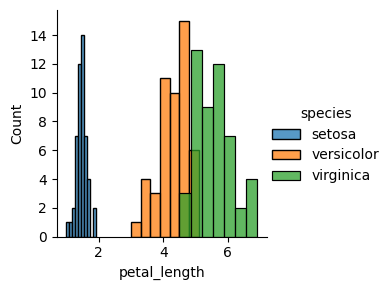

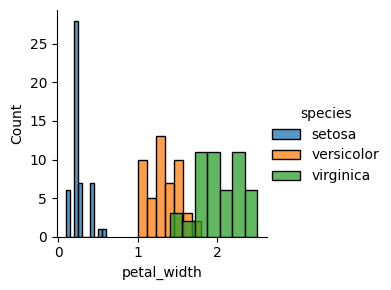

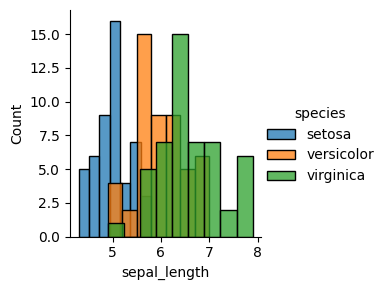

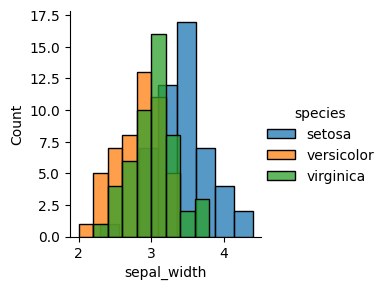

In [14]:
# First to split the data into the three classes.add(

# 1. Setosa
# 2. Versicolor
# 3. Virginica
# The target variable is the species of the iris flower, which is categorical.
# The features are the measurements of the iris flowers, which are numerical.

setosa = df[df['species'] == 'setosa']
versicolor = df[df['species'] == 'versicolor']
virginica = df[df['species'] == 'virginica']

# Plotting the histograms with each species in a different colour.

sns.FacetGrid(df, hue="species", height=3).map(sns.histplot, "petal_length").add_legend()
sns.FacetGrid(df, hue="species", height=3).map(sns.histplot, "petal_width").add_legend()
sns.FacetGrid(df, hue="species", height=3).map(sns.histplot, "sepal_length").add_legend()
sns.FacetGrid(df, hue="species", height=3).map(sns.histplot, "sepal_width").add_legend()
plt.show()

Observations on plots#

The plots are all colour coded by species; blue for setosa, orange for versicolor, and green for virginica. 
From the plots it can be seen that for sepal length by species, the setosa species showed a normal distribution with the majority of sepals being around 5.0 cm in length. The versicolor species has a broader range of sepal lengths, with the majority of sepals being approximately 5.5 cm in length. The species with the largest range in length of sepals is the virginica species, and of all the species it is the species with the longest average sepal length.
The plot for sepal width demonstrates that the overall data for all the samples has a normal distribution. 
Contrary to the sepal length data, the smallest sepal width is the cersicolor species, with the virginica species being in the middle of the range, and the setosa species having the largest width. The setosa species also has the broadest range in values of width. 
Similarly to the sepal length, for petal length setosa was the species with the shortest average length and the smallest range. The versicolor species is the species that has an average petal length of around 4.5 cm and demonstrated a normal distribution of values. The virginica species was the species with the longest petal lengths on average, similarly to the sepal lengths. Petal width for the setosa species was the shortest on average. The versicolor species, was the mid-width species, with values between 1.0 cm and 2.0 cm. The petal width for the virginica species was the widest.
The sepal width and petal width for the setosa species are contrary to one another. For the petal measurements of length and width, the setosa species is the shortest and narrowest and the values for this species also separated away from the other two species.

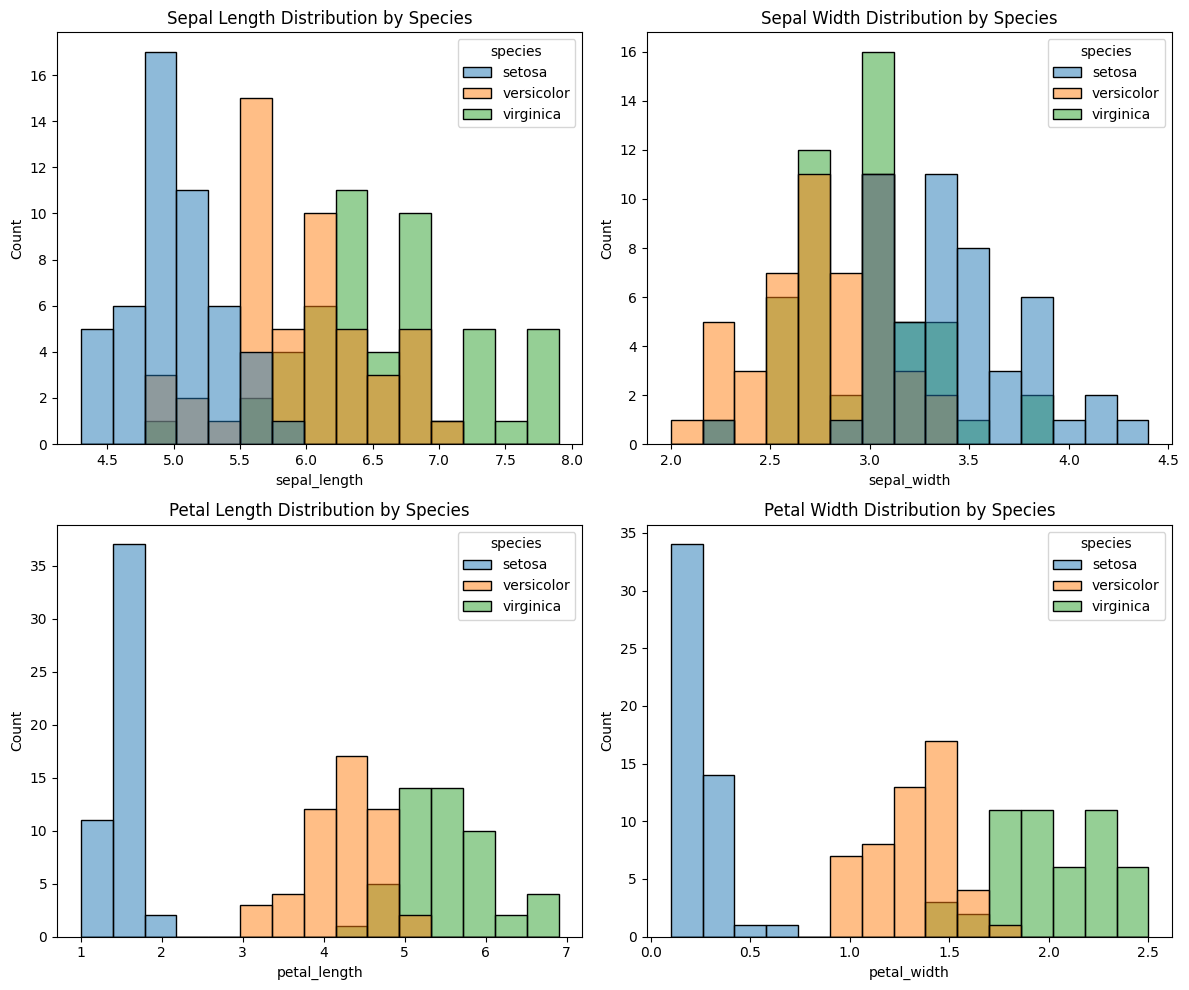

In [15]:
# Set up the figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot histogram for Sepal Length
sns.histplot(data=df, x="sepal_length", hue="species", kde=False, ax=axes[0, 0], bins=15)
axes[0, 0].set_title("Sepal Length Distribution by Species")

# Plot histogram for Sepal Width
sns.histplot(data=df, x="sepal_width", hue="species", kde=False, ax=axes[0, 1], bins=15)
axes[0, 1].set_title("Sepal Width Distribution by Species")

# Plot histogram for Petal Length
sns.histplot(data=df, x="petal_length", hue="species", kde=False, ax=axes[1, 0], bins=15)
axes[1, 0].set_title("Petal Length Distribution by Species")

# Plot histogram for Petal Width
sns.histplot(data=df, x="petal_width", hue="species", kde=False, ax=axes[1, 1], bins=15)
axes[1, 1].set_title("Petal Width Distribution by Species")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Next need to boxplot and seperate by species.

and add error bars to the plots

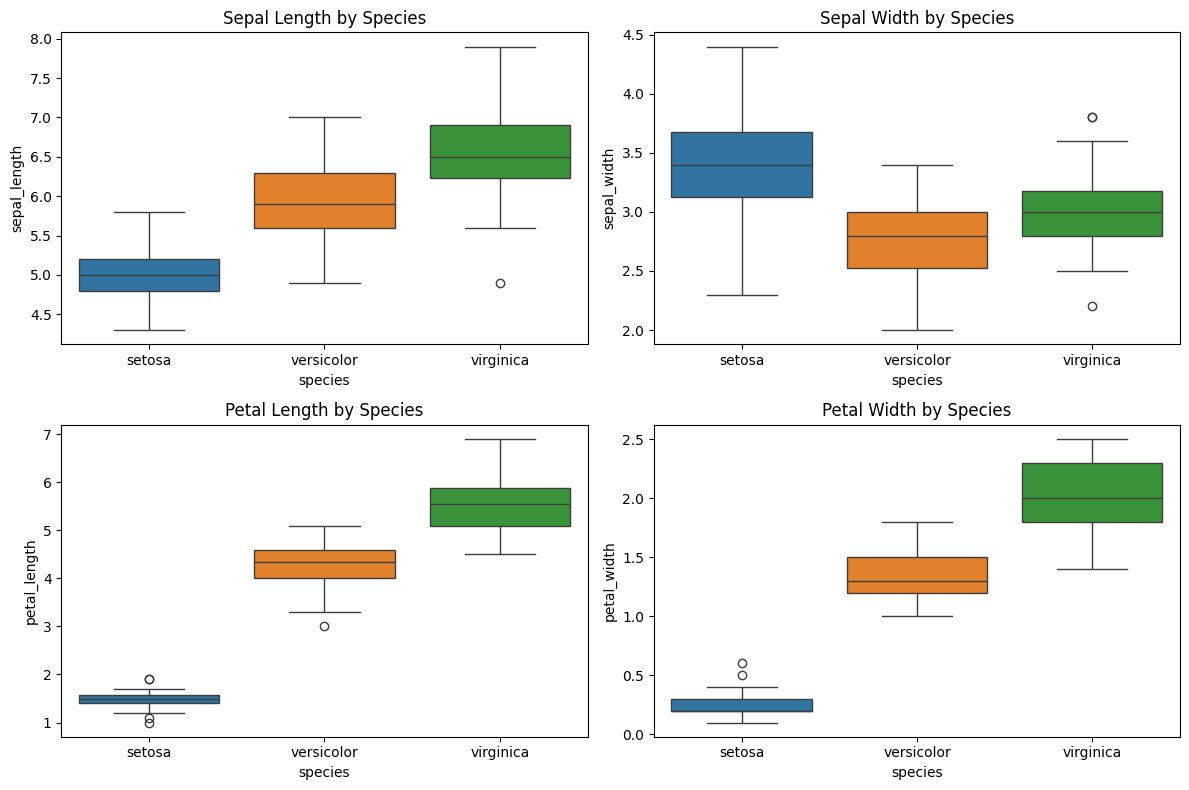

In [16]:
# Boxplots by species

# Define feature names and their corresponding titles
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
titles = ['Sepal Length by Species', 'Sepal Width by Species', 
          'Petal Length by Species', 'Petal Width by Species']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    ax = plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, hue='species', data=df, ax=ax)
    ax.set_title(titles[i])
plt.tight_layout()
plt.show()

## Task 5: Investigate Relationships

Scatter plots - good way to see the general gist of what is happening with a dataset

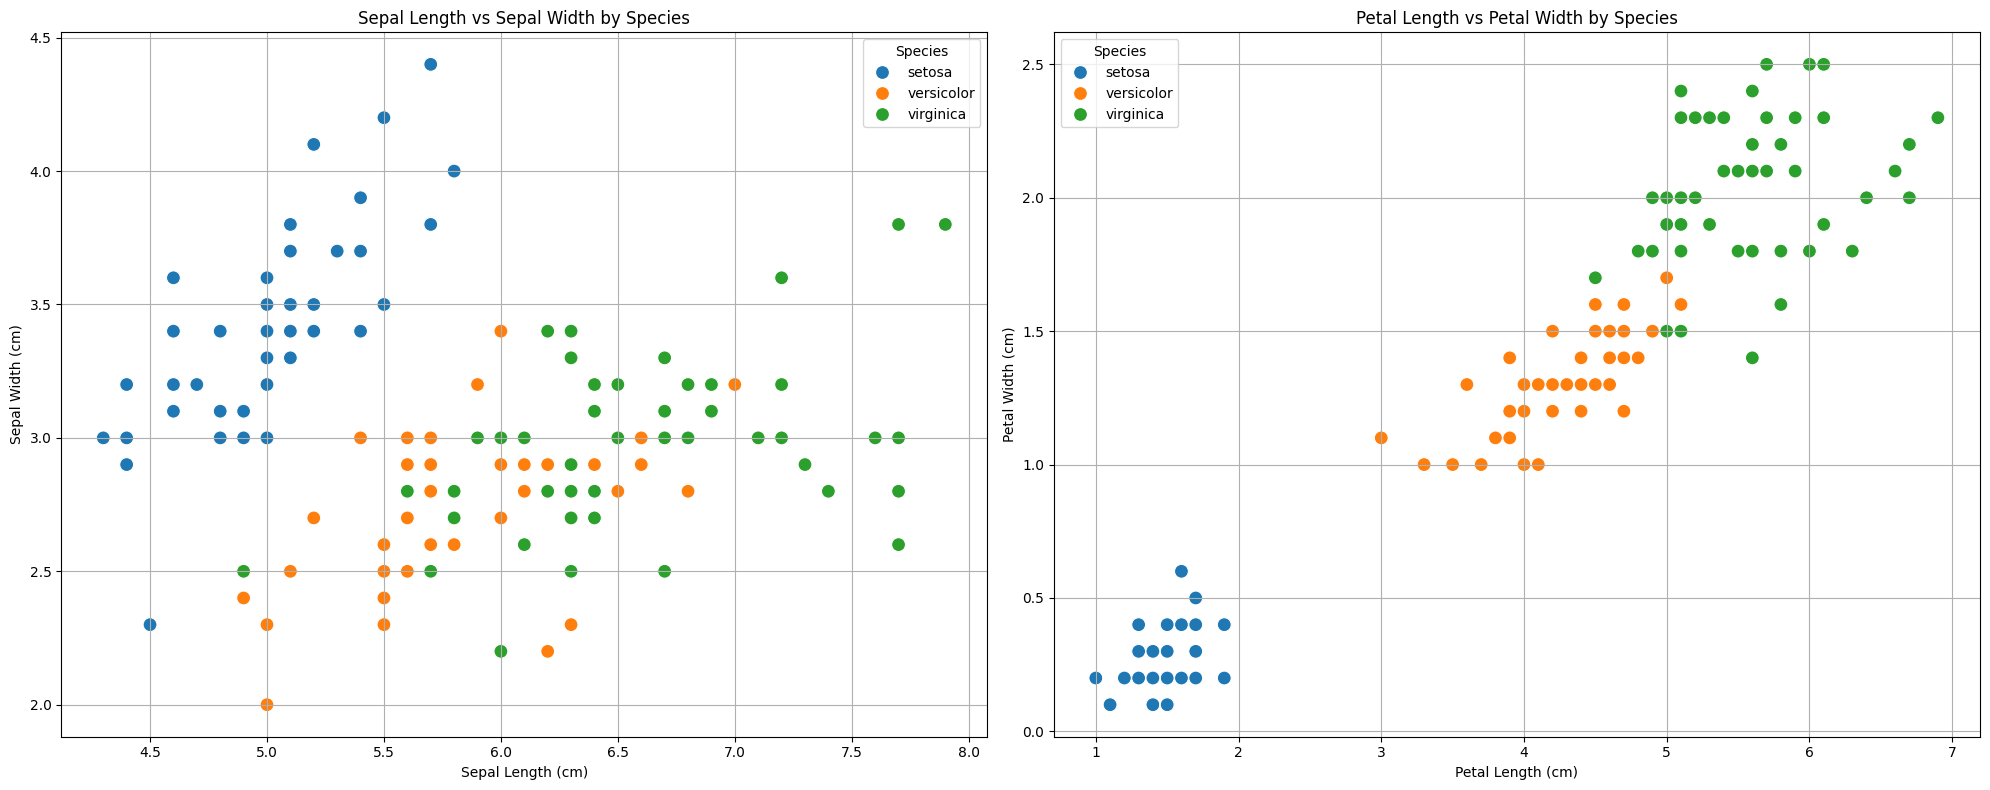

In [17]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Scatter plot for sepal length vs width
sns.scatterplot(ax=axes[0], data=df, x='sepal_length', y='sepal_width', hue='species', s=100)
axes[0].set_title('Sepal Length vs Sepal Width by Species')
axes[0].set_xlabel('Sepal Length (cm)')
axes[0].set_ylabel('Sepal Width (cm)')
axes[0].legend(title='Species')
axes[0].grid(True)

# Scatter plot for petal length vs width
sns.scatterplot(ax=axes[1], data=df, x='petal_length', y='petal_width', hue='species', s=100)
axes[1].set_title('Petal Length vs Petal Width by Species')
axes[1].set_xlabel('Petal Length (cm)')
axes[1].set_ylabel('Petal Width (cm)')
axes[1].legend(title='Species')
axes[1].grid(True)

plt.tight_layout()
plt.show()

Using a number of different plotting methods the data can be visualised. Due to the nature of the measurements taken for the data, it may be suitable to split the dataset for some plots into those looking at species vs. sepal or petal width/length, and using a boxplot to measure the length vs. width of sepal or petal.

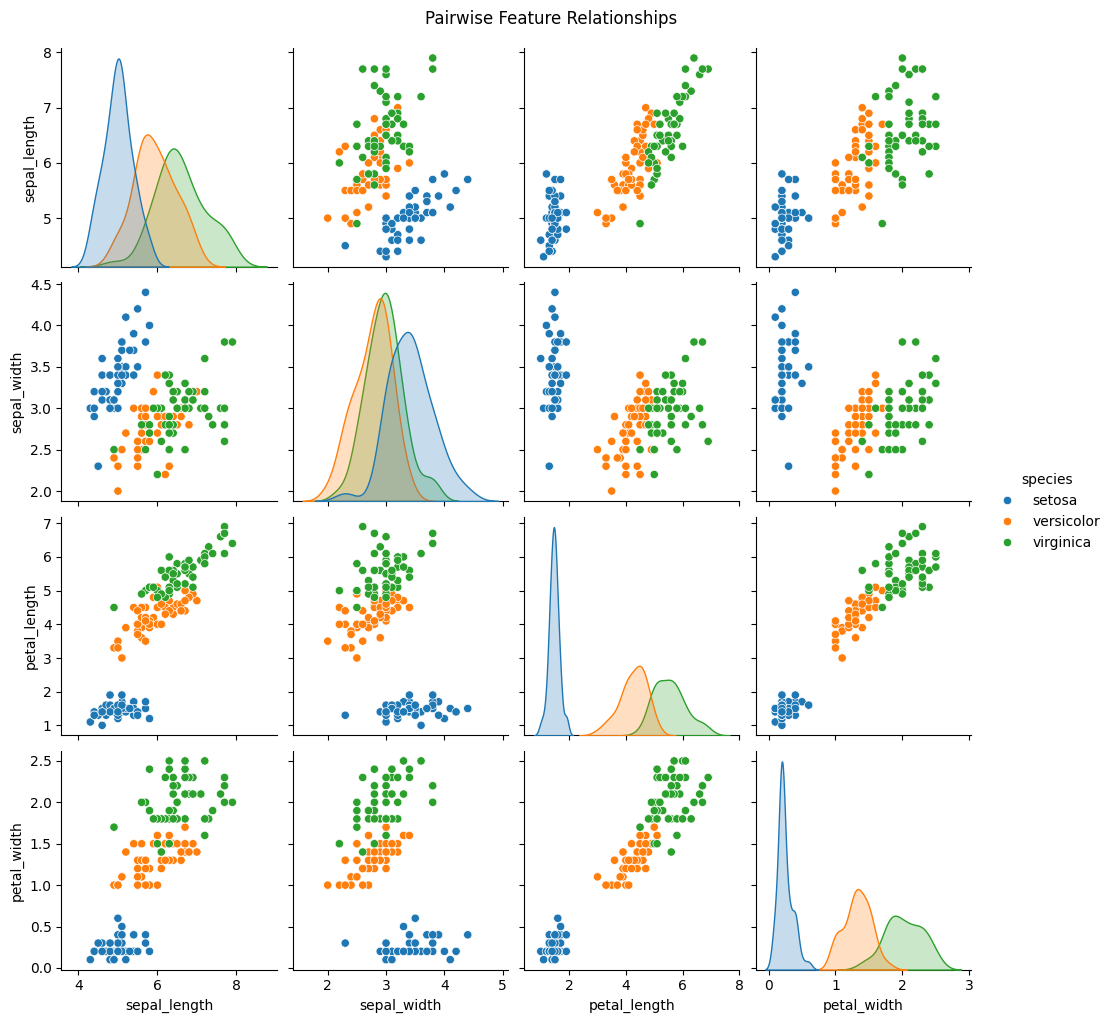

In [18]:
## Visualization
# Pairplot colored by species
sns.pairplot(df, hue='species', height=2.5)
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

A way to conduct relationship investigations is through Principal Component Analysis (PCA) - I did this for my PhD research and found it was a great way to clearly loot at multiple data aspects at once. 

In [19]:
## Principal Component Analysis
X = df.iloc[:, :4] # The first four columns are the features (sepal length, sepal width, petal length, petal width)
# The last column is the target variable (species).
y = df['species']
# However, we need to standardise the data before performing PCA.


An important note of PCA is that the data needs to be standardised for it. 
When standardising data, it's important that it is scaled correctly, otherwise the results will appear skewed and purely incorrect.

In [20]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])  # Print first 5 rows of scaled data

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


The analysis can then be run again.

In [21]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

We can then view the standardised PCA analysis.

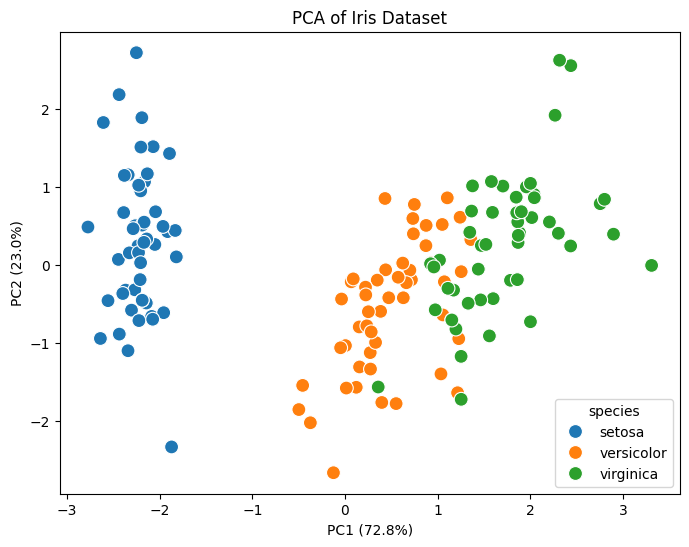

In [22]:
# Visualize PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], 
                hue=df['species'], s=100) # Scatter plot of the first two principal components
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})') # PC1 is the first principal component, which is the petal length and width
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})') # PC2 is the second principal component, which is the sepal length and width
plt.title("PCA of Iris Dataset")
plt.show()

## Task 6: Analyze Relationship

### What do the relationships show? 

#### Data Structure:

150 samples with 4 features (all numerical)

3 balanced classes (50 samples per species)

No missing values


#### PCA Insights:

First 2 components explain 95.8% of variance

PC1 (73% variance) strongly correlates with petal measurements Suggesting that petal length and width are responsible for the majority of the variance within the data.

PC2 (22.8% variance) relates to sepal width and length 



## Task 7: Analyze Class Distributions

To specifically analyse the data seen within each species, the data needs to be seperated out into the 3 respective species.

We already know that the iris dataset is balanced with 50 samples measured for each of the three species.

## Task 8: Compute Correlations

In order to assess whether there are similarities or differences between the species and the length/width of the sepals and petals, it is important to conduct analysis into the relationship between sepal length and width, and petal length and with against the particular species. This will also help further down the line when designing a method to predict the species of an iris flower from measurements alone.

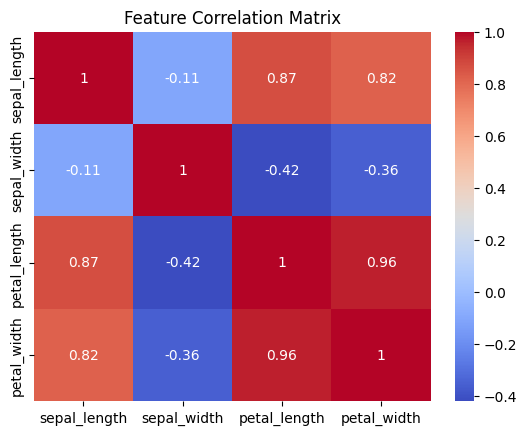

In [23]:
## Correlation Analysis
corr_matrix = df.iloc[:, :4].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

From the plot, it can be seen that the warmer the colour/higher the number, closer to 1 in the range (-0.4 - 1), the greater the correlation with the other feature analysed.

#### Feature Relationships:

Petal measurements show strong positive correlation (r=0.96)

Sepal width has lowest correlation with other features

Setosa is distinctly different in petal measurements

## Task 9: Fit a Simple Linear Regression

Basic linear regression was conducted on the dataset. First the dataset was split into sepal length and width data, as well as petal length and width data. For making models and predicting for multiple features, this will be done after using a logistic regression model.

The dataset for the linear regression models for the sepal data and petal data was split into train and test data ( 80 % for training 20 % for testing). This was done for the length and width data values.

Sepal Linear Regression Results:
Coefficient: -0.0527
Intercept: 3.3634
Mean squared error: 0.1397
R-squared score: 0.0236


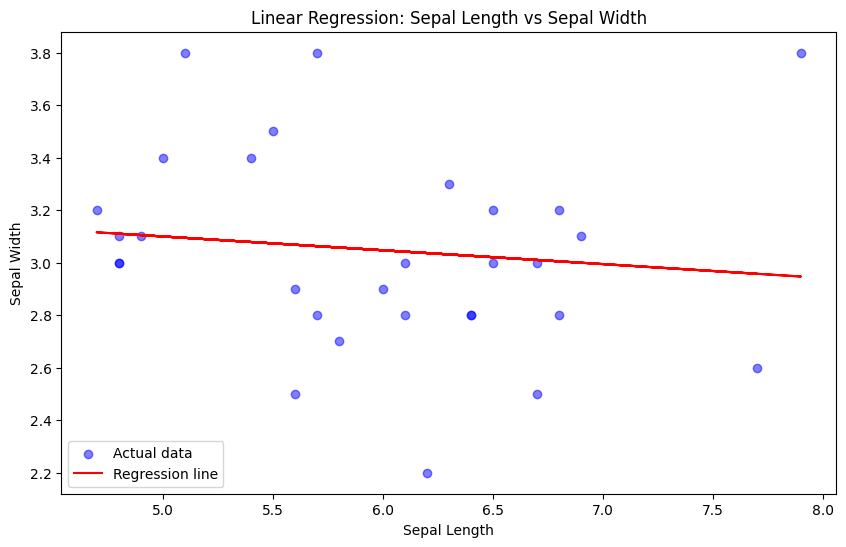

In [42]:
# Prepare data for sepal linear regression
X_sepal = df[['sepal_length']]
y_sepal = df['sepal_width']

# Split the dataset
X_sepal_train, X_sepal_test, y_sepal_train, y_sepal_test = train_test_split(X_sepal, y_sepal, test_size=0.2, random_state=42)

# Create and fit the model
model_sepal = LinearRegression()
model_sepal.fit(X_sepal_train, y_sepal_train)

# Make predictions
y_sepal_pred = model_sepal.predict(X_sepal_test)

# Calculate metrics
mse_sepal = mean_squared_error(y_sepal_test, y_sepal_pred)
r2_sepal = r2_score(y_sepal_test, y_sepal_pred)

print("Sepal Linear Regression Results:")
print(f"Coefficient: {model_sepal.coef_[0]:.4f}")
print(f"Intercept: {model_sepal.intercept_:.4f}")
print(f"Mean squared error: {mse_sepal:.4f}")
print(f"R-squared score: {r2_sepal:.4f}")

# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(X_sepal_test, y_sepal_test, color='blue', alpha=0.5, label='Actual data')
plt.plot(X_sepal_test, y_sepal_pred, color='red', label='Regression line')
# adding a title and labels
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Linear Regression: Sepal Length vs Sepal Width')
plt.legend()
plt.show()

The plot of the LRM for the sepal length and width shows a low linear relationship between the length and width of the sepal. That is, although there was some relationship between the length and width of the sepal, due to the low linear relationship, the accuracy of the prediction of one value (i.e. sepal width) based on another value (i.e. sepal length) would not be very/entirely accurate.

This was then used to predict:

In [43]:
# Example prediction for sepal model
new_sepal_length = pd.DataFrame([[5.7]], columns=['sepal_length'])  # Match the feature name used during training - np array is still there just within the dataframe now
predicted_sepal_width = model_sepal.predict(new_sepal_length)

print("\nSepal Width Prediction:")
print(f"For a sepal length of 5.7 cm, the predicted sepal width is: {predicted_sepal_width[0]:.2f} cm")


Sepal Width Prediction:
For a sepal length of 5.7 cm, the predicted sepal width is: 3.06 cm


Next the same was done with the petal length and width


Petal Linear Regression Results:
Coefficient: 0.4141
Intercept: -0.3609
Mean squared error: 0.0456
R-squared score: 0.9283


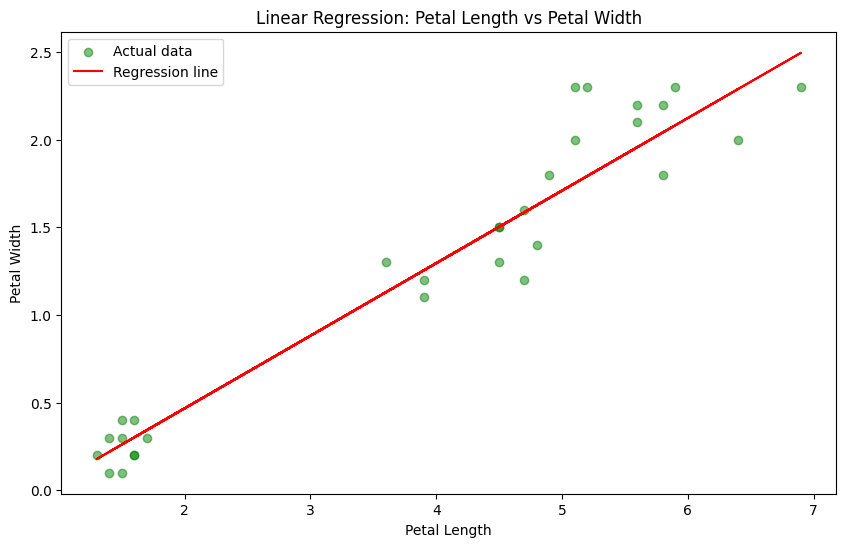

In [44]:
# Prepare data for petal linear regression
X_petal = df[['petal_length']]
y_petal = df['petal_width']

# Split the dataset
X_petal_train, X_petal_test, y_petal_train, y_petal_test = train_test_split(X_petal, y_petal, test_size=0.2, random_state=42)

# Create and fit the model
model_petal = LinearRegression()
model_petal.fit(X_petal_train, y_petal_train)

# Make predictions
y_petal_pred = model_petal.predict(X_petal_test)

# Calculate metrics
mse_petal = mean_squared_error(y_petal_test, y_petal_pred)
r2_petal = r2_score(y_petal_test, y_petal_pred)

print("\nPetal Linear Regression Results:")
print(f"Coefficient: {model_petal.coef_[0]:.4f}")
print(f"Intercept: {model_petal.intercept_:.4f}")
print(f"Mean squared error: {mse_petal:.4f}")
print(f"R-squared score: {r2_petal:.4f}")

# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(X_petal_test, y_petal_test, color='green', alpha=0.5, label='Actual data')
plt.plot(X_petal_test, y_petal_pred, color='red', label='Regression line')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Linear Regression: Petal Length vs Petal Width')
plt.legend()
plt.show()

Moderate to high linear relationship between petal length and width values.

A prediction was also made:

In [45]:
# Example prediction for petal model
new_petal_length = pd.DataFrame([[4.5]], columns=['petal_length'])  # Match the feature name used during training - np array is again wrapped in the dataframe 
predicted_petal_width = model_petal.predict(new_petal_length)

print("\nPetal Width Prediction:")
print(f"For a petal length of 4.5 cm, the predicted petal width is: {predicted_petal_width[0]:.2f} cm")


Petal Width Prediction:
For a petal length of 4.5 cm, the predicted petal width is: 1.50 cm


## Task 10: Too Many Features

There are a number of features for analysis within this data. To make predictions with multiple features more accurately a Logistic Regression model can be made. Although a linear regression model has previously been added to the data, it is possible to predict a species based on the measurements taken through using a logistic regression model.

Logistic model for species classification:

In [46]:
# Prepare data for species classification
X_species = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_species = df['species']

# Encode species names to numerical values
le = LabelEncoder()
y_species = le.fit_transform(y_species)

# Split the dataset
X_species_train, X_species_test, y_species_train, y_species_test = train_test_split(X_species, y_species, test_size=0.2, random_state=42)

# Create and fit the model
model_species = LogisticRegression(max_iter=200)
model_species.fit(X_species_train, y_species_train)

# Make predictions
y_species_pred = model_species.predict(X_species_test)

# Calculate accuracy
accuracy = accuracy_score(y_species_test, y_species_pred)

print("\nLogistic Regression for Species Classification Results:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_species_test, y_species_pred, target_names=le.classes_))

# Example prediction
example_data = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], 
                            columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])  # Match feature names
predicted_species = model_species.predict(example_data)

print(f"\nPredicted species for {example_data.iloc[0].tolist()}: {le.inverse_transform(predicted_species)[0]}")


Logistic Regression for Species Classification Results:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Predicted species for [5.1, 3.5, 1.4, 0.2]: setosa


Model Performance:

Logistic regression achieves ~97% accuracy

Virginica shows slightly lower recall due to overlap with Versicolor

Most confusion occurs between Versicolor and Virginica

Why choose this model?
Reason:

Simple baseline for multi-class classification

Interpretable coefficients

Works well with small, linearly separable datasets

Purpose:

Precision/Recall: Measures class-specific performance

F1-score: Balanced metric for imbalanced classes (though Iris is balanced)

Confusion Matrix: Visualizes error patterns between similar classes

Plot confusion matrix

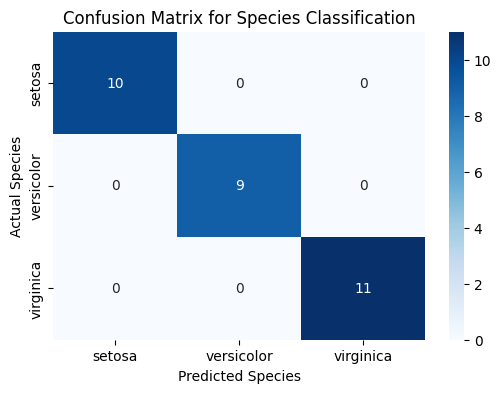

In [47]:
# Confusion matrix
# Generate the confusion matrix
cm = confusion_matrix(y_species_test, y_species_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix for Species Classification")
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()

The confusion matrix is a performance evaluation tool for classification models. It provides a summary of the prediction results by comparing the actual labels with the predicted labels. Here's what it shows and why it's useful:

### What the Confusion Matrix Shows:
1. **Structure**: 
   - Rows represent the **actual classes** (ground truth).
   - Columns represent the **predicted classes** (model output).

2. **Values in the Matrix**:
   - **Diagonal values**: Correct predictions (where actual and predicted classes match).
   - **Off-diagonal values**: Misclassifications (where actual and predicted classes differ).


- The diagonal values represent correct predictions.
- Off-diagonal values represent misclassifications.

### Why Use a Confusion Matrix:
1. **Detailed Performance Insight**:
   - It provides a breakdown of correct and incorrect predictions for each class, which is more informative than a single metric like accuracy.

2. **Class-Specific Performance**:
   - Helps identify if the model is performing poorly for specific classes (e.g., one species being misclassified more often than others).

3. **Metrics Derivation**:
   - Metrics like **precision**, **recall**, **F1-score**, and **specificity** can be derived from the confusion matrix to evaluate the model's performance in more detail.

4. **Debugging and Improvement**:
   - By analyzing misclassifications, you can identify patterns or biases in the model, which can guide improvements (e.g., collecting more data for underperforming classes).

In this case, the confusion matrix will helps in understanding how well the logistic regression model classifies the different species and whether there are specific species that are more prone to misclassification.

## References

Stevens, S. S. 1946. On the Theory of Scales of Measurement. Science, Vol. 103, No. 2648. http://expsylab.psych.uoa.gr/fileadmin/expsylab.psych.uoa.gr/uploads/papers/Stevens_1946.pdf

Python. 2025. Built-in types. https://docs.python.org/3/library/stdtypes.html

Stackoverflow user "Life is complex". First and last n rows of a dataframe. https://stackoverflow.com/questions/58260771/how-to-show-firstlast-n-rows-of-a-dataframe

Thesis

https://medium.com/@nirajan.acharya777/exploratory-data-analysis-of-iris-dataset-9c0df76771df

understanding linear regression https://datatab.net/tutorial/linear-regression

# HELP DOCS

https://www.geeksforgeeks.org/iris-dataset/

https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/

https://stackoverflow.com/questions/58260771/how-to-show-firstlast-n-rows-of-a-dataframe

https://bytemedirk.medium.com/mastering-iris-dataset-analysis-with-python-9e040a088ef4

https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html

https://medium.com/@kachiann/a-beginners-guide-to-machine-learning-with-python-iris-flower-prediction-61814e095268

https://www.geeksforgeeks.org/python-basics-of-pandas-using-iris-dataset/